Defining imports at the top that will be used by the report.
In this case, having all the imports at the top is more intuitive than having some of them at the top and some of them scattered over the file.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import plotly.express as px

# import the KNN Imputer class
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()

# Import label encoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
scaler=StandardScaler()

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Extracting data into pandas Dataframe ignoring column `id`.


In [2]:
kidney_disease_df = pd.read_csv("chronic_kidney_disease_full.csv", usecols=range(1, 26))
kidney_disease_df.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


Rectifying column names.


In [3]:
kidney_disease_df.columns = kidney_disease_df.columns.str.replace("'", "")
kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Checking duplicates in dataframe.
kidney_disease_df[kidney_disease_df.duplicated()]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class


In [5]:
# Storing original dataset and will be using more EDA over other stored variable
kidney_disease_df_org = kidney_disease_df.copy(deep=True)


kidney_disease_df_org.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# Replacing missing values i.e. '?' with NAN
kidney_disease_df = kidney_disease_df.replace("?", np.NaN)


kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# Columns with nominal data
categorical_cols = [
    "sg",
    "al",
    "su",
    "rbc",
    "pc",
    "pcc",
    "ba",
    "htn",
    "dm",
    "cad",
    "appet",
    "pe",
    "ane",
    "class",
]

# Columns with numerical data
non_categorical_cols = [
    "age",
    "bp",
    "ba",
    "bgr",
    "bu",
    "sc",
    "sod",
    "pot",
    "hemo",
    "pcv",
    "wbcc",
    "rbcc",
]

In [8]:
# Pie Chart Visualization
for pie_col_name in categorical_cols:
    pie_graph = px.pie(
        kidney_disease_df,
        hole=0.3,
        values=kidney_disease_df[pie_col_name].value_counts(),
        names=kidney_disease_df[pie_col_name].value_counts().index,
        color_discrete_sequence=px.colors.sequential.Agsunset,
        title=pie_col_name + " Column Representation",
    )

    # Update the layout to center the title
    pie_graph.update_layout(
        title_x=0.5, legend=dict(yanchor="top", y=0.9, xanchor="center", x=0.25)
    )

    pie_graph.show()

In [9]:
def encode(data):
    """function to encode non-null data"""

    data_no_null = np.array(data.dropna())  # retains only non-null values

    encoded_data = label_encoder.fit_transform(data_no_null)  # encode date

    data.loc[data.notnull()] = np.squeeze(
        encoded_data
    )  # Assign back encoded values to non-null values

    return data


kidney_disease_df[categorical_cols] = kidney_disease_df[categorical_cols].apply(encode)

kidney_disease_df[categorical_cols] = kidney_disease_df[categorical_cols].astype(
    "category"
)


kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,3,1,0,NaN,1,0,0,121,...,44,7800,5.2,1,1,0,0,0,0,0
1,7,50,3,4,0,NaN,1,0,0,NaN,...,38,6000,NaN,0,0,0,0,0,0,0
2,62,80,1,2,3,1,1,0,0,423,...,31,7500,NaN,0,1,0,1,0,1,0
3,48,70,0,4,0,1,0,1,0,117,...,32,6700,3.9,1,0,0,1,1,1,0
4,51,80,1,2,0,1,1,0,0,106,...,35,7300,4.6,0,0,0,0,0,0,0


In [10]:
def impute(data, col):
    """function to impute null data"""

    result = knn_imputer.fit_transform(data)

    if col in categorical_cols:
        return result.astype(int)

    return np.round(result, 2)


for col in kidney_disease_df.columns:

    kidney_disease_df[[col]] = impute(kidney_disease_df[[col]], col)


kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,0,1,0,0,121.00,...,44.0,7800.0,5.20,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,0,1,0,0,148.04,...,38.0,6000.0,4.71,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.00,...,31.0,7500.0,4.71,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.00,...,32.0,6700.0,3.90,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.00,...,35.0,7300.0,4.60,0,0,0,0,0,0,0


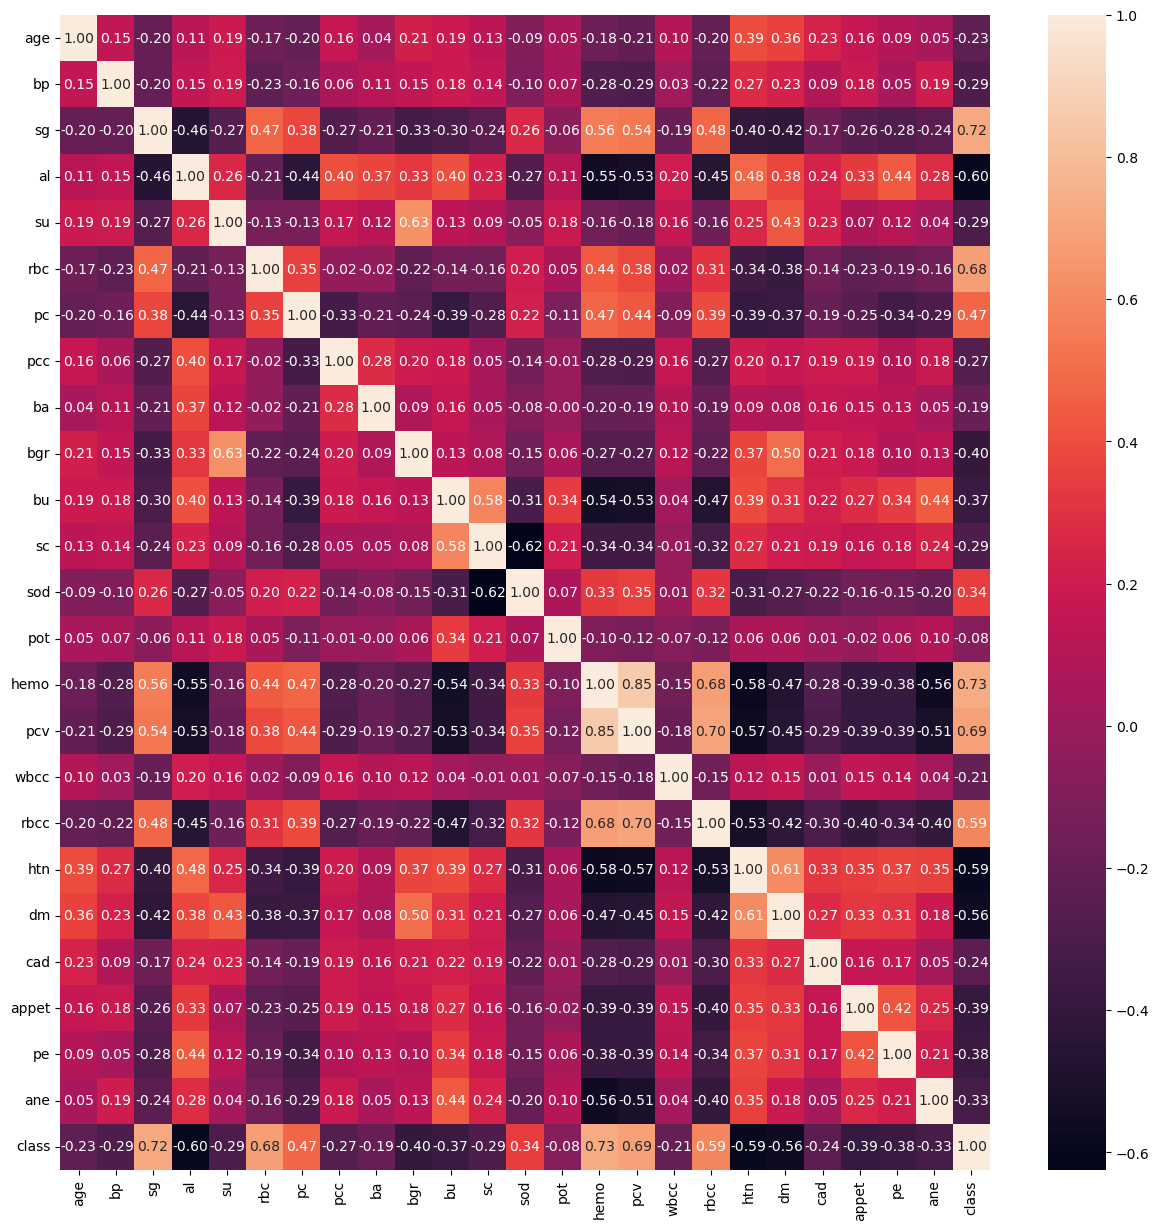

In [11]:
# Correlation Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(kidney_disease_df.corr(), annot=True, fmt=".2f")

plt.xticks(rotation="90")
plt.yticks(rotation="0")

plt.show()

In [12]:
# Understanding numerical data for outliers
kidney_disease_df[non_categorical_cols].describe()

,age,bp,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,0.055000,148.036900,57.425925,3.07235,137.529025,4.627850,12.526900,38.883700,8406.121800,4.708275
std,16.974966,13.476298,0.228266,74.782634,49.285887,5.61749,9.204273,2.819783,2.716171,8.151082,2523.219976,0.840315
min,2.000000,50.000000,0.000000,22.000000,1.500000,0.40000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,101.000000,27.000000,0.90000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.235000,0.000000,126.000000,44.000000,1.40000,137.530000,4.630000,12.530000,38.880000,8406.120000,4.710000
75%,64.000000,80.000000,0.000000,150.000000,61.750000,3.07000,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.000000,490.000000,391.000000,76.00000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [13]:
# Fit and transform the scaler to the training data
kidney_disease_df[non_categorical_cols] = scaler.fit_transform(
    kidney_disease_df[non_categorical_cols]
)

kidney_disease_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.205459,0.262336,3,1,0,0,1,0,-0.241249,-0.361993,...,0.628470,-0.240518,0.585900,1,1,0,0,0,0,0
1,-2.623805,-1.966582,3,4,0,0,1,0,-0.241249,0.000042,...,-0.108551,-0.954786,0.002055,0,0,0,0,0,0,0
2,0.620318,0.262336,1,2,3,1,1,0,-0.241249,3.681436,...,-0.968408,-0.359563,0.002055,0,1,0,1,0,1,0
3,-0.205459,-0.480637,0,4,0,1,0,1,-0.241249,-0.415548,...,-0.845571,-0.677015,-0.963076,1,0,0,1,1,1,0
4,-0.028507,0.262336,1,2,0,1,1,0,-0.241249,-0.562825,...,-0.477061,-0.438926,-0.129012,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    kidney_disease_df.drop(columns="class", axis=1),
    kidney_disease_df["class"],
    test_size=0.2,
    random_state=42,
)

X_train.shape, X_test.shape

((320, 24), (80, 24))

Running GridSearchCV for DecisionTree_Classifier.
GridSearchCV best params for DecisionTree_Classifier are {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 6}
Determined model: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       random_state=42)


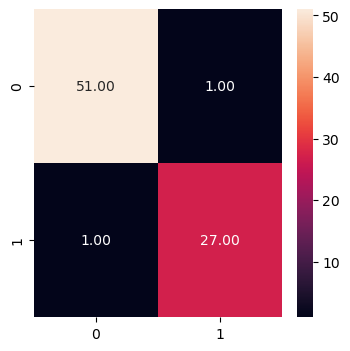


Classification Matrix:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

GridSearchCV for DecisionTree_Classifier completed.

Running GridSearchCV for RandomForest_Classifier.
GridSearchCV best params for RandomForest_Classifier are {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 20}
Determined model: RandomForestClassifier(max_depth=7, n_estimators=20, random_state=42)


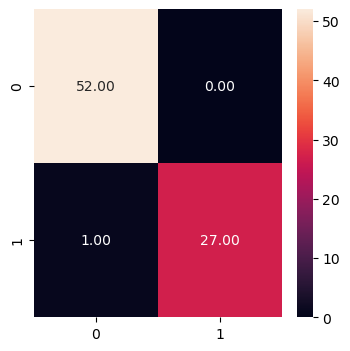


Classification Matrix:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

GridSearchCV for RandomForest_Classifier completed.



,Model_Name,Train_Accuracy,Test_Accuracy,ROC_AUC,Precision,Recall,F1 Score,Model
1,RandomForest_Classifier,1.0,0.9875,0.982143,1.000000,0.964286,0.981818,"(DecisionTreeClassifier(max_depth=7, max_featu..."
0,DecisionTree_Classifier,1.0,0.9750,0.972527,0.964286,0.964286,0.964286,"DecisionTreeClassifier(ccp_alpha=0.001, criter..."


In [15]:
train_model_lists = []
model_details = {
    "DecisionTree_Classifier": DecisionTreeClassifier(random_state=42),
    "RandomForest_Classifier": RandomForestClassifier(random_state=42),
}


param_details = {
    "DecisionTree_Classifier": {
        "ccp_alpha": [0.1, 0.01, 0.001],
        "max_depth": list(range(0, 9)),
        "criterion": ["gini", "entropy"],
    },
    "RandomForest_Classifier": {
        "n_estimators": list(range(10, 50, 5)),
        "max_depth": list(range(0, 9)),
        "criterion": ["gini", "entropy"],
    },
}

for key in model_details.keys():
    print("Running GridSearchCV for %s." % key)

    grid_search = GridSearchCV(
        model_details.get(key), param_details.get(key), cv=10, n_jobs=-1, refit=True
    )
    grid_search.fit(X_train, y_train)
    print(f"GridSearchCV best params for {key} are {grid_search.best_params_}")

    predicted_model = grid_search.best_estimator_

    predicted_model.fit(X_train, y_train)

    y_pred = predicted_model.predict(X_test)
    y_train_pred = predicted_model.predict(X_train)

    train_model_lists.append(
        [
            key,
            accuracy_score(y_train, y_train_pred),
            accuracy_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            predicted_model,
        ]
    )
    print(f"Determined model: {predicted_model}")

    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f")
    plt.show()

    print("\nClassification Matrix:\n", classification_report(y_test, y_pred))

    print("GridSearchCV for %s completed.\n" % key)

model_df = pd.DataFrame(
    train_model_lists,
    columns=[
        "Model_Name",
        "Train_Accuracy",
        "Test_Accuracy",
        "ROC_AUC",
        "Precision",
        "Recall",
        "F1 Score",
        "Model",
    ],
).sort_values(by=["Recall", "F1 Score"], ascending=False)

model_df

In [16]:
best_model = model_df.head(1).Model.values[0]
best_model

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=42)

In [17]:
# create an iterator object with write permission - model.pkl
with open("model_pkl", "wb") as files:
    pickle.dump(best_model, files)

In [18]:
with open("model_pkl", "rb") as f:
    pickle_model = pickle.load(f)
print(pickle_model)

RandomForestClassifier(max_depth=7, n_estimators=20, random_state=42)
